## Getting the data ready

In [1]:
# Import the heart disease dataset and save it to a variable
# using pandas and read_csv()
# Hint: You can directly pass the URL of a csv to read_csv()
# heart_disease = ###

# Check the first 5 rows of the data

import pandas as pd
import numpy as np
heart_disease = pd.read_csv('Data/heart-disease.csv')
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
# # Create X (all columns except target)
# X = ###

# # Create y (only the target column)
# y = ###

x = heart_disease.drop('target',axis = 1)

y = heart_disease['target']


In [3]:
# # Import train_test_split from sklearn's model_selection module
# ###

# # Use train_test_split to split X & y into training and test sets
# X_train, X_test, y_train, y_test = ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [4]:
# View the different shapes of the training and test datasets
###

X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Prepare a machine learning model 

In [5]:
# Import the RandomForestClassifier from sklearn's ensemble module
###

# Instantiate an instance of RandomForestClassifier as clf

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

## Fitting a model and making perdictions

In [6]:
# Fit the RandomForestClassifier to the training data
clf.fit(X_train,y_train)

RandomForestClassifier()

In [7]:
# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds

y_preds = clf.predict(X_test)

## Evaluate a model's predictions

In [8]:
# Evaluate the fitted model on the training set using the score() function
clf.score(X_train,y_train)

1.0

In [9]:
# Evaluate the fitted model on the test set using the score() function
clf.score(X_test,y_test)

0.7868852459016393

## Experimenting with different classification models

In [10]:
# Import LinearSVC from sklearn's svm module
###

# Import KNeighborsClassifier from sklearn's neighbors module
###

# Import SVC from sklearn's svm module
###

# Import LogisticRegression from sklearn's linear_model module
###

# Note: we don't have to import RandomForestClassifier, since we already have

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [11]:
# # EXAMPLE: Instantiating a RandomForestClassifier() in a dictionary
# example_dict = {"RandomForestClassifier": RandomForestClassifier()}

# # Create a dictionary called models which contains all of the classification models we've imported
# # Make sure the dictionary is in the same format as example_dict
# # The models dictionary should contain 5 models
# models = {"LinearSVC": ###,
#           "KNN": ###,
#           "SVC": ###,
#           "LogisticRegression": ###,
#           "RandomForestClassifier": ###}

# # Create an empty dictionary called results
# results = ###

models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

results = {}

In [12]:
# EXAMPLE: Looping through example_dict fitting and scoring the model
for model_name,model in models.items():
    model.fit(X_train,y_train)
    results[model_name] = model.score(X_test,y_test)
results

C:\Users\Avita\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Avita\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8032786885245902,
 'KNN': 0.5409836065573771,
 'SVC': 0.6065573770491803,
 'LogisticRegression': 0.8032786885245902,
 'RandomForestClassifier': 0.7868852459016393}

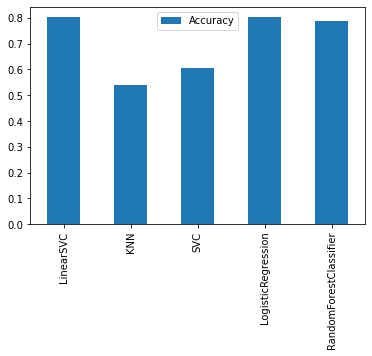

In [13]:
# # Create a pandas dataframe with the data as the values of the results dictionary,
# # the index as the keys of the results dictionary and a single column called accuracy.
# # Be sure to save the dataframe to a variable.
# results_df = pd.DataFrame(results.###(), 
#                           results.###(), 
#                           columns=[####])

# # Create a bar plot of the results dataframe using plot.bar()
###


results_df = pd.DataFrame(results.values(),results.keys() ,columns=['Accuracy'])
results_df.plot.bar();

In [14]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [15]:
# # Setup np random seed of 42
# np.random.seed(###)

# # Import RandomizedSearchCV from sklearn's model_selection module


# # Setup an instance of RandomizedSearchCV with a LogisticRegression() estimator,
# # our log_reg_grid as the param_distributions, a cv of 5 and n_iter of 5.
# rs_log_reg = RandomizedSearchCV(estimator=###,
#                                 param_distributions=###,
#                                 cv=###,
#                                 n_iter=###,
#                                 verbose=###)

# # Fit the instance of RandomizedSearchCV
# ###

from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=10,
                                n_jobs=-1,
                                verbose=2)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [16]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
###
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [17]:
# Score the instance of RandomizedSearchCV using the test data
###
rs_log_reg.score(X_test,y_test)

0.8032786885245902

In [18]:
# # Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
# clf = LogisticRegression(###)

# # Fit the new instance of LogisticRegression with the best hyperparameters on the training data 
# ###

clf = LogisticRegression(solver= 'liblinear', C= 0.23357214690901212)
clf.fit(X_train,y_train);

In [19]:
# Import confusion_matrix and classification_report from sklearn's metrics module
###

# Import precision_score, recall_score and f1_score from sklearn's metrics module
###

# Import plot_roc_curve from sklearn's metrics module
###

from sklearn.metrics import confusion_matrix , precision_score, recall_score, f1_score,plot_roc_curve


In [20]:
# Make predictions on test data and save them
###
ypreds = clf.predict(X_test)
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [21]:
# Create a confusion matrix using the confusion_matrix function
###
confusion_matr = confusion_matrix(y_test,y_preds)
confusion_matr

array([[20,  6],
       [ 7, 28]], dtype=int64)

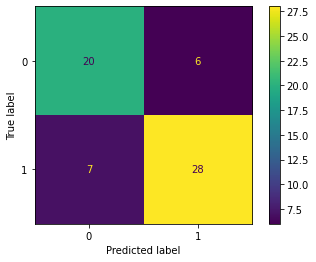

In [22]:
# Create a more visual confusion matrix
###
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_preds);

In [23]:
# Create a classification report using the classification_report function
###
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        26
           1       0.82      0.80      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [24]:
# Find the precision score of the model using precision_score()
###
from sklearn.metrics import precision_score
precision_score(y_test,y_preds)

0.8235294117647058

In [25]:
# Find the recall score
###
from sklearn.metrics import recall_score
recall_score(y_test,y_preds)

0.8

In [26]:
from sklearn.metrics import f1_score
f1_score(y_test,y_preds)

0.8115942028985507

C:\Users\Avita\Desktop\sample_project_1\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


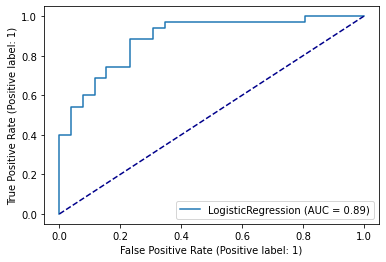

In [39]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

plot_roc_curve(clf,X_test,y_test);
plt.plot([0,1],[0,1],color='darkblue', linestyle='--',label='Guessing')

In [44]:
# Import cross_val_score from sklearn's model_selection module
###
from sklearn.model_selection import cross_val_score
cross_val_score(clf, x,y ,scoring='accuracy', cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [46]:
# EXAMPLE: Taking the mean of the returned values from cross_val_score 
# gives a cross-validated version of the scoring metric.
cross_val_acc = np.mean(cross_val_score(clf,
                                        x,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

0.8479781420765027

In [47]:
# Find the cross-validated precision
###
cross_val_precis = np.mean(cross_val_score(clf,
                                        x,
                                        y,
                                        scoring="precision",
                                        cv=5))

cross_val_precis

0.8215873015873015

In [48]:
# Find the cross-validated recall
###
cross_val_recall = np.mean(cross_val_score(clf,
                                        x,
                                        y,
                                        scoring="recall",
                                        cv=5))

cross_val_recall

0.9272727272727274

In [49]:
# Find the cross-validated F1 score
###
cross_val_f1 = np.mean(cross_val_score(clf,
                                        x,
                                        y,
                                        scoring="f1",
                                        cv=5))

cross_val_f1

0.8705403543192143

## Exporting and importing a trained model

In [50]:
# Import the dump and load functions from the joblib library
###
from joblib import dump, load
# Use the dump function to export the trained model to file
###
dump(clf,filename='Models/gs_random_forest_model_2.joblib')


['Models/gs_random_forest_model_2.joblib']

In [52]:
# Use the load function to import the trained model you just exported
# Save it to a different variable name to the origial trained model
###

# Evaluate the loaded trained model on the test data
###
loaded_clf = load("Models/gs_random_forest_model_2.joblib")
loaded_clf.score(X_test, y_test)

0.819672131147541

## Scikit-Learn Regression Practice

In [55]:
# Read in the car sales data

# View the first 5 rows of the car sales data
###

car_sales = pd.read_csv('Data/car-sales-extended-missing-data.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [54]:
# Get information about the car sales DataFrame
###
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [62]:
# Find number of missing values in each column
###
car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
# Find the datatypes of each column of car_sales
###
car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [61]:
# Remove rows with no labels (NaN's in the Price column)
###
car_sales.dropna(subset=['Price'],inplace=True)

## Buildig a pipeline

In [106]:
# Import Pipeline from sklearn's pipeline module
###

from sklearn.pipeline import Pipeline


# Import ColumnTransformer from sklearn's compose module
###

from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
###

from sklearn.impute import SimpleImputer
# Import OneHotEncoder from sklearn's preprocessing module
###
from sklearn.preprocessing import OneHotEncoder


In [107]:
#Deifine different categorical features
categorical_features = ['Make','Colour']

#Create categorical transformer Pipline
categorical_transformer = Pipeline(steps=[
         ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
         ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))
])

In [108]:
#define Doors features
door_features = ['Doors']

#Create Doors transformer Pipline
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value=477))
])

In [109]:
#Define numeric features 
numeric_featues = ['Odometer (KM)']

#Create numeric transformer pipline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

In [110]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ('cat',categorical_transformer,categorical_features),
    ('door',door_transformer,door_features),
    ('num',numeric_transformer,numeric_featues)
])

In [111]:
# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

# Import SVR from sklearn's svm module
from sklearn.svm import SVR

# Import RandomForestRegressor from sklearn's ensemble module
from sklearn.ensemble import RandomForestRegressor


In [112]:
# Create dictionary of model instances, there should be 4 total key, value pairs
# in the form {"model_name": model_instance}.
# Don't forget there's two versions of SVR, one with a "linear" kernel and the
# other with kernel set to "rbf".
regression_models = {'Ridge': Ridge(),
                     'SVR_linear': SVR(kernel='linear'),
                     'SVR_rbf': SVR(kernel='rbf'),
                    'RandomForestRegressor': RandomForestRegressor()}
regression_results = {}

In [113]:
# Create car sales X data (every column of car_sales except Price)
car_sales_X = car_sales.drop('Price',axis=1)

# Create car sales y data (the Price column of car_sales)
car_sales_y = car_sales['Price']


In [114]:
# Use train_test_split to split the car_sales_X and car_sales_y data into 
# training and test sets.
# Give the test set 20% of the data using the test_size parameter.
# For reproducibility set the random_state parameter to 42.
car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size=0.2,
                                                                    random_state=42)

# Check the shapes of the training and test datasets
car_X_train.shape, car_X_test.shape, car_y_train.shape, car_y_test.shape

((760, 4), (190, 4), (760,), (190,))

In [115]:
# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    
    # Create a model pipeline with a preprocessor step and model step
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    # Fit the model pipeline to the car sales training data
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)
    
    # Score the model pipeline on the test data appending the model_name to the 
    # results dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test, 
                                                          car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [116]:
# Check the results of each regression model by printing the regression_results
# dictionary
regression_results

{'Ridge': 0.2720703941298237,
 'SVR_linear': 0.002092581900269286,
 'SVR_rbf': 0.0018546778586426838,
 'RandomForestRegressor': 0.20882796394688308}

In [117]:
# Import mean_absolute_error from sklearn's metrics module
from sklearn.metrics import mean_absolute_error

# Import mean_squared_error from sklearn's metrics module
from sklearn.metrics import mean_squared_error

# Import r2_score from sklearn's metrics module
from sklearn.metrics import r2_score

In [120]:
# Create RidgeRegression Pipeline with preprocessor as the "preprocessor" and
# Ridge() as the "model".
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

# Fit the RidgeRegression Pipeline to the car sales training data
ridge_pipeline.fit(car_X_train, car_y_train)

# Make predictions on the car sales test data using the RidgeRegression Pipeline
car_y_preds = ridge_pipeline.predict(car_X_test)

# View the first 50 predictions
car_y_preds[:50]

array([18455.38728115, 22251.08618273, 11031.32306555,  6638.14885911,
        8917.29974744, 10909.30171479, 15396.99117399, 13825.55293009,
       19803.21387022, 14472.61482714,  6398.57993993, 16669.24952582,
       11761.34991798, 13615.83814049, 13720.68643138, 16377.76372262,
       16047.31427828, 10083.44238108, 11652.14794954, 11684.77991123,
       12173.54014514, 12810.62820072, 17819.29881844, 22481.74828802,
       11949.4241319 , 14186.68445326, 18531.1857186 , 14734.96710569,
       20179.34417689, 19458.27232285, 18202.65451853, 22379.10482555,
       12482.38472068, 14399.95747262, 18418.88543708, 19503.67225998,
       12188.36934336, 12024.37761197, 18743.41203361, 11265.27033451,
       15407.71004553, 17418.71732886, 19184.67888405, 16955.3117857 ,
       14579.27168652, 12628.46109504, 12457.00273379,  8600.7357412 ,
       14878.30073412, 18547.14058037])

In [121]:
# EXAMPLE: Find the MSE by comparing the car sales test labels to the car sales predictions
mse = mean_squared_error(car_y_test, car_y_preds)
# Return the MSE
mse

48741942.946151465

In [122]:
# Find the MAE by comparing the car sales test labels to the car sales predictions
mae = mean_absolute_error(car_y_test, car_y_preds)
# Return the MAE
mae

5638.544440951603

In [123]:
# Find the R^2 score by comparing the car sales test labels to the car sales predictions
r2 = r2_score(car_y_test, car_y_preds)
# Return the R^2 score
r2

0.2720703941298237